$\texttt{Particle Swarm Optimization}$:

Given Levi N. 13 function,
$$f(x, y) = sin^2(3\pi x)+(x-1)^2(1+sin^2(3\pi y))+(y-1)^2(1+sin^2(2\pi y))$$

- Our task is to optimize this function using PSO in a search space of $-10 \leq x,y \leq 10$.

- Let us consider 20 particles and perform 50 iterations and check the results.

In [116]:
import numpy as np
import random
from copy import deepcopy
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [117]:
def levi(x):
  return (np.sin(3*np.pi*x[:,0])**2)+((1+(np.sin(3*np.pi*x[:,1]))**2)*((x[:,0]-1)**2))+((1+(np.sin(2*np.pi*x[:,1]))**2)*((x[:,1]-1)**2))

In [118]:
def velocity_update(w,c1,c2,vel_vec,pos_vec,pbest_positions,gbest_pos,n_particles):
  return (w*vel_vec) + ((c1*random.random()) * (pbest_positions - pos_vec)) + ((c2*random.random()) * (np.array([gbest_pos for i in range(n_particles)])-pos_vec))

def pos_update(vel_vec, pos_vec):
  return pos_vec+vel_vec

def PSO(n_iter, w, n_particles,c1,c2):  
  pos_vec = np.array([[random.uniform(-10,10),random.uniform(-10,10)] for j in range(n_particles)])
  all_pos = []
  all_gbest_pos = []
  vel_vec = np.array([[0,0] for j in range(n_particles)])
  pbest_positions = pos_vec.copy()
  pbest_vals = np.array([float('inf') for i in range(n_particles)])
  gbest_pos = np.array([0,0])
  gbest_val = float('inf')
  for i in range(n_iter):
    fitness_vec = levi(pos_vec)
    pbest_positions = [pos_vec[j] if fitness_vec[j]<pbest_vals[j] else pbest_positions[j] for j in range(n_particles)]
    pbest_vals = np.minimum(pbest_vals,fitness_vec)
    ind = np.argmin(pbest_vals)
    gbest_pos = pbest_positions[ind]
    gbest_val = pbest_vals[ind]
    vel_vec = velocity_update(w,c1,c2,vel_vec,pos_vec,pbest_positions,gbest_pos,n_particles)
    pos_vec = pos_update(vel_vec,pos_vec)
    pos_val = np.c_[pos_vec,levi(pos_vec)]
    all_pos.append(pos_val)
    all_gbest_pos.append([gbest_pos[0],gbest_pos[1],gbest_val])
    #adaptive intertial factor
    # w = 0.95*w 
  return [np.array(gbest_pos),np.array(all_pos),np.array(all_gbest_pos)]

In [128]:
w,c1,c2,n_iter,n_particles = 0.6,0.8,0.9,20,20
ans = PSO(n_iter, w, n_particles,c1,c2)
ans1 = ans[0]
print("--------------------------------------------------------------------------------------------------------------")

print("Gbest Position is", (ans1[0],ans1[1]), "and its value is",ans[2][-1,-1])
print("______________________________________________________________________________________________________________")

print("The error in fitness of the actual global optimum and the PSO result is", ans[2][-1,-1])
print("______________________________________________________________________________________________________________")


--------------------------------------------------------------------------------------------------------------
Gbest Position is (0.9991293442198896, 0.9985945826559401) and its value is 7.006614153073135e-05
______________________________________________________________________________________________________________
The error in fitness of the actual global optimum and the PSO result is 7.006614153073135e-05
______________________________________________________________________________________________________________


In [138]:
! pip install plotly

Locator attempting to generate 1719 ticks ([0.0, ..., 429.5]), which exceeds Locator.MAXTICKS (1000).


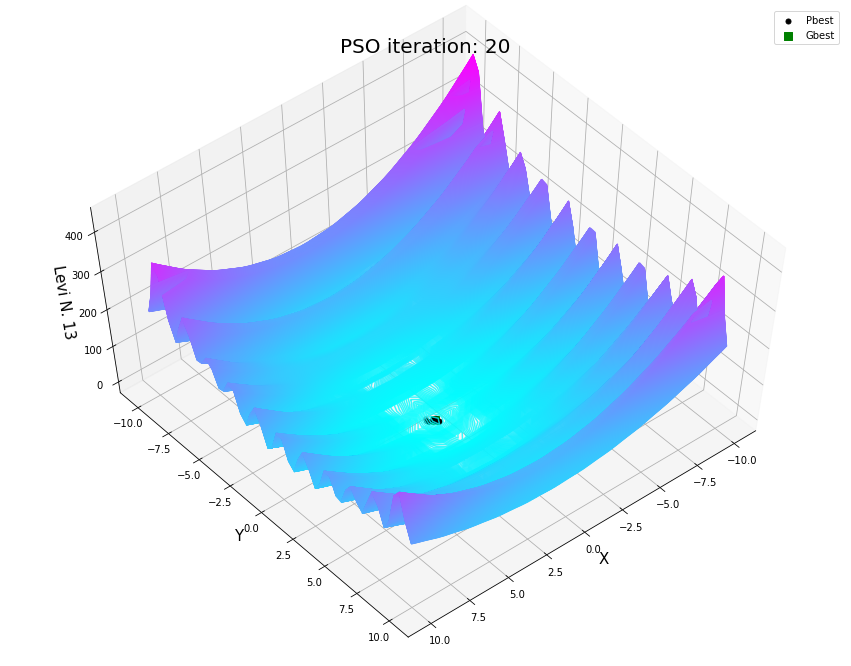

In [131]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import imageio

def levi(x,y):
  return (np.sin(3*np.pi*x)**2)+((1+(np.sin(3*np.pi*y))**2)*((x-1)**2))+((1+(np.sin(2*np.pi*y))**2)*((y-1)**2))

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50) # transpose
X, Y = np.meshgrid(x, y)
Z = levi(X,Y)
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
ax.view_init(azim=50,elev=60)
ax.contour3D(X, Y, Z,2000, cmap='cool',alpha=0.8)
ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('Y',fontsize=15)
ax.set_zlabel('Levi N. 13',fontsize=15)
video =[]
for i in range(n_iter):
  plt.title('PSO iteration: '+str(i+1),y=1,fontsize=20)
  a = ax.scatter3D(ans[1][i,:,0], ans[1][i,:,1], ans[1][i,:,2], c='black', marker='o',s=25,label="Pbest")
  b = ax.scatter3D(ans[2][i,0], ans[2][i,1], ans[2][i,2], c='green', marker=',', s=75,label="Gbest")
  ax.legend(loc="upper right")
  leg = ax.get_legend()
  leg.legendHandles[0].set_color('black')
  leg.legendHandles[1].set_color('green')
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  video.append(image)
  if i!=n_iter-1:    
    a.remove()
    b.remove()
imageio.mimsave('PSO_3d.gif', video, fps=5)


Now let us plot the Function value v/s time.(In this case the optimum is minimum so the Funtion value keeps decreasing)

Locator attempting to generate 1719 ticks ([0.0, ..., 429.5]), which exceeds Locator.MAXTICKS (1000).


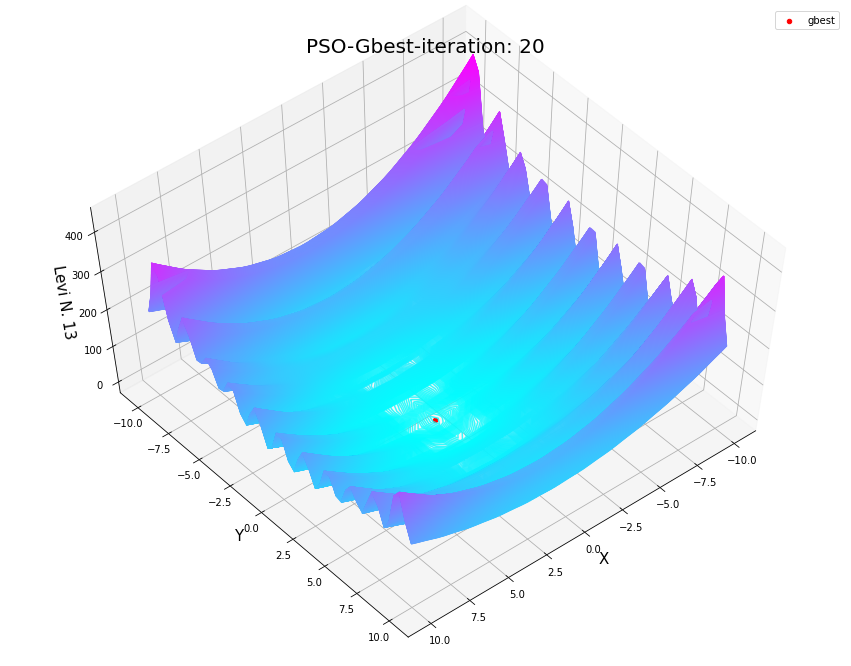

In [132]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50) # transpose
X, Y = np.meshgrid(x, y)
Z = levi(X,Y)
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
ax.view_init(azim=50,elev=60)
ax.contour3D(X, Y, Z,2000, cmap='cool',alpha=0.8)
ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('Y',fontsize=15)
ax.set_zlabel('Levi N. 13',fontsize=15)
video =[]
for i in range(n_iter):
  plt.title('PSO-Gbest-iteration: '+str(i+1),y=1,fontsize=20)
  b = ax.scatter3D(ans[2][i,0], ans[2][i,1], ans[2][i,2], c='red', marker='o', s=20, label="gbest")
  ax.legend(loc="upper right")
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  video.append(image)
  if i!=n_iter-1:    
    b.remove()
imageio.mimsave('PSO_gbest_3d.gif', video, fps=5)

In [139]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=np.arange(n_iter), y=ans[2][:,2],line=dict(color='red', width=2),marker=dict(color='orange'),mode='lines+markers',name='gbest'))
fig.update_layout(title='Gbest value v/s Iteration no.',
                   xaxis_title='Iteration',
                   yaxis_title='Gbest Value')
fig.show()